# Import Dependencies & Data

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv("RuralData.csv")
data

,FIPS,POP2010,OHU2010,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,...,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,County,State,Percentage
0,1001,25405.0,9226.0,9226.0,6735.0,2871.0,19933.0,4757.0,102.0,10.0,...,0.600000,0.600000,0.000000,0.0,0.0,0.600000,0.000000,Autauga County,Alabama,0.130
1,1003,99521.0,38925.0,34391.0,23339.0,15274.0,86990.0,7355.0,561.0,42.0,...,0.117647,0.117647,0.000000,0.0,0.0,0.117647,0.000000,Baldwin County,Alabama,0.093
2,1005,20819.0,7135.0,9337.0,4137.0,2936.0,10188.0,9524.0,66.0,9.0,...,0.428571,0.428571,0.000000,0.0,0.0,0.428571,0.000000,Barbour County,Alabama,0.162
3,1007,22915.0,7953.0,10123.0,5201.0,2906.0,17381.0,5047.0,22.0,13.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Bibb County,Alabama,0.137
4,1009,50272.0,18830.0,19923.0,12552.0,6944.0,46898.0,583.0,92.0,33.0,...,0.125000,0.125000,0.000000,0.0,0.0,0.125000,0.000000,Blount County,Alabama,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,56037,25380.0,9558.0,6908.0,7041.0,2089.0,22391.0,241.0,169.0,25.0,...,0.166667,0.166667,0.166667,0.0,0.0,0.166667,0.166667,Sweetwater County,Wyoming,0.084
3086,56039,19023.0,7998.0,4818.0,3727.0,1812.0,16913.0,47.0,207.0,11.0,...,0.333333,0.333333,0.333333,0.0,0.0,0.333333,0.333333,Teton County,Wyoming,0.042
3087,56041,21118.0,7668.0,6955.0,6371.0,1874.0,19514.0,55.0,61.0,36.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Uinta County,Wyoming,0.087
3088,56043,3326.0,1317.0,1013.0,884.0,593.0,3106.0,6.0,15.0,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,Washakie County,Wyoming,0.087


### Select Features & Target Data

In [3]:
X = data[['POP2010','MedianFamilyIncome', 'PovertyRate', 'TractLOWI', 'TractKids',
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'OHU2010', 'LA1and20']]
y = data['Percentage'].values.reshape(-1, 1)

# Linear Regression (Without Training)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f'MSE = {mse}')
print(f'R-Squared = {r2}')
print(f'Model.Score = {model.score(X,y)}')

MSE = 0.000258483558812525
R-Squared = 0.48946539278349444
Model.Score = 0.48946539278349444


### Residual Plot(X,y)

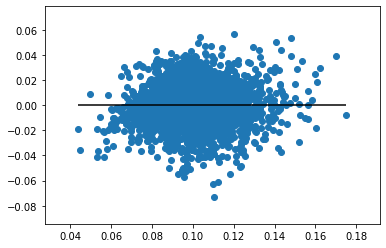

In [5]:
plt.scatter(predicted, predicted - y)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear Regression (Train_Test_Split)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.48931779944550474
Testing Score: 0.48523612770330227


### Residual Plot (X_train, X_test, y_train, y_test)

Text(0.5, 1.0, 'Residual Plot')

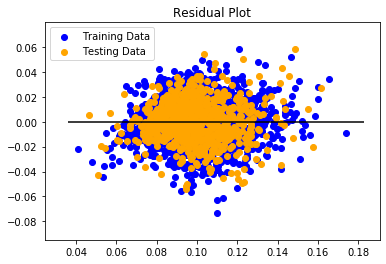

In [8]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# RandomForestRegression on Non-Scaled Data

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\ASush\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [10]:
rf.score(X_test, y_test)

0.6023442914018663

In [11]:
rf.feature_importances_

array([0.01278594, 0.12230982, 0.28918744, 0.03981179, 0.03103972,
       0.02543562, 0.01821619, 0.19847683, 0.04069526, 0.02435944,
       0.05000891, 0.0347664 , 0.09094636, 0.01411047, 0.00784981])

In [12]:
X.columns

Index(['POP2010', 'MedianFamilyIncome', 'PovertyRate', 'TractLOWI',
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'OHU2010',
       'LA1and20'],
      dtype='object')

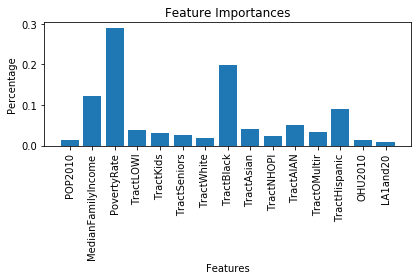

In [13]:
plt.bar(X.columns, rf.feature_importances_)
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.tight_layout()

# Data Scaling

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4881719841121254
Testing Score: 0.487588611648816


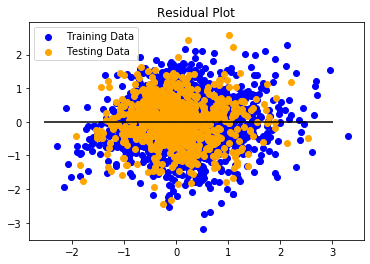

In [19]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [20]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4784239296041848, R2: 0.487588611648816


# Lasso

In [21]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4996815657441196, R2: 0.46482082313844586


# Ridge

In [22]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.47840627575033773, R2: 0.4876075196406612


# ElasticNet 

In [23]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4944603108626238, R2: 0.4704129983981074


# RandomForestRegressor on Scaled Data

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train_scaled)

C:\Users\ASush\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
rf.score(X_test_scaled, y_test_scaled)

0.5623729270999214

In [26]:
rf.feature_importances_

array([0.01290687, 0.16493518, 0.249086  , 0.03052131, 0.02938045,
       0.02674123, 0.01970693, 0.21075242, 0.03480971, 0.02580324,
       0.04558726, 0.03377594, 0.0908695 , 0.01505275, 0.01007122])

In [27]:
X.columns

Index(['POP2010', 'MedianFamilyIncome', 'PovertyRate', 'TractLOWI',
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'OHU2010',
       'LA1and20'],
      dtype='object')